In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [17]:
# Load Iris dataset
iris = datasets.load_iris()
data = iris.data

# Preprocessing Techniques
scaler = StandardScaler()
pca = PCA(n_components=2)

# Different preprocessing steps
data_no_processing = data
data_normalized = scaler.fit_transform(data)
data_pca = pca.fit_transform(data)
data_tn = data_normalized
data_tn_pca = pca.fit_transform(data_tn)

preprocessed_data = {
    'No Data Processing': data_no_processing,
    'Normalization': data_normalized,
    'Using PCA': data_pca,
    'T+N': data_tn,
    'T+N+PCA': data_tn_pca
}


In [18]:
# Define clustering algorithms
clustering_algorithms = {
    'K-Means': KMeans,
    'Hierarchical': AgglomerativeClustering,
    'Mean-Shift': MeanShift
}


In [19]:
# Store results in a list
results = []

# Perform clustering for all combinations of preprocessing and clustering algorithms
for preprocessing_name, preprocessed in preprocessed_data.items():
    for algo_name, algo_class in clustering_algorithms.items():
        if algo_name == 'Mean-Shift':
            # Mean-Shift does not use n_clusters
            model = algo_class()
        else:
            model = algo_class(n_clusters=3)  # Use 3 clusters for consistency

        labels = model.fit_predict(preprocessed)

        # Calculate metrics
        silhouette = silhouette_score(preprocessed, labels)
        calinski = calinski_harabasz_score(preprocessed, labels)
        davies = davies_bouldin_score(preprocessed, labels)

        # Append results
        results.append({
            'Clustering Algorithm': algo_name,
            'Preprocessing': preprocessing_name,
            'Silhouette Score': round(silhouette, 3),
            'Calinski-Harabasz Index': round(calinski, 3),
            'Davies-Bouldin Index': round(davies, 3)
        })


In [21]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the result table
print(results_df)


   Clustering Algorithm       Preprocessing  Silhouette Score  \
0               K-Means  No Data Processing             0.551   
1          Hierarchical  No Data Processing             0.554   
2            Mean-Shift  No Data Processing             0.686   
3               K-Means       Normalization             0.457   
4          Hierarchical       Normalization             0.447   
5            Mean-Shift       Normalization             0.582   
6               K-Means           Using PCA             0.598   
7          Hierarchical           Using PCA             0.598   
8            Mean-Shift           Using PCA             0.710   
9               K-Means                 T+N             0.460   
10         Hierarchical                 T+N             0.447   
11           Mean-Shift                 T+N             0.582   
12              K-Means             T+N+PCA             0.511   
13         Hierarchical             T+N+PCA             0.511   
14           Mean-Shift  

In [22]:
# Save the results to a CSV for further use
results_df.to_csv('clustering_results.csv', index=False)

# Print confirmation
print("Results saved to 'clustering_results.csv'.")


Results saved to 'clustering_results.csv'.


In [23]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, title):
    """
    Plot the clustering results using a 2D scatter plot.
    Args:
        data: 2D array (e.g., after PCA)
        labels: Cluster labels
        title: Title of the plot
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title, fontsize=14)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.colorbar(label="Cluster Label")
    plt.grid(True)
    plt.show()


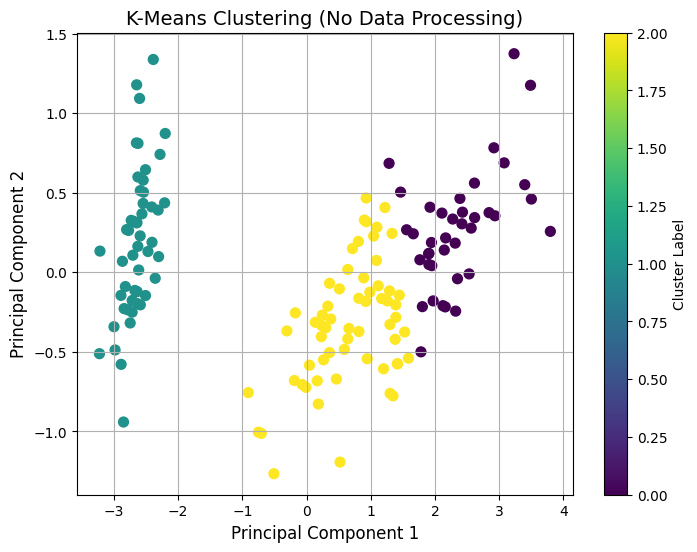

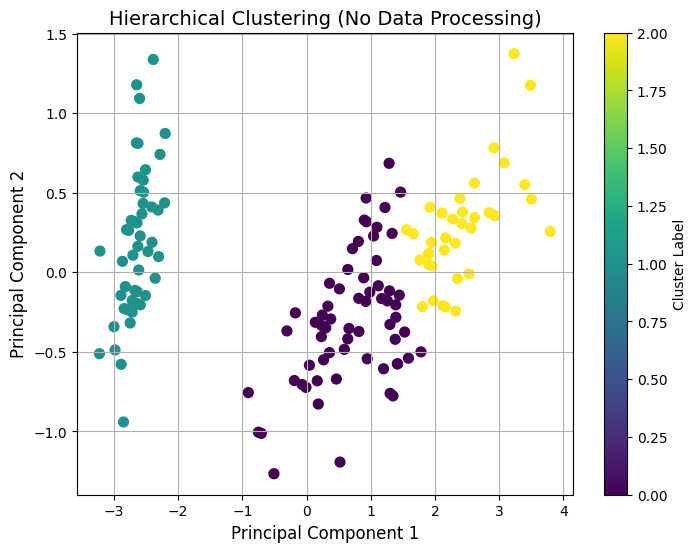

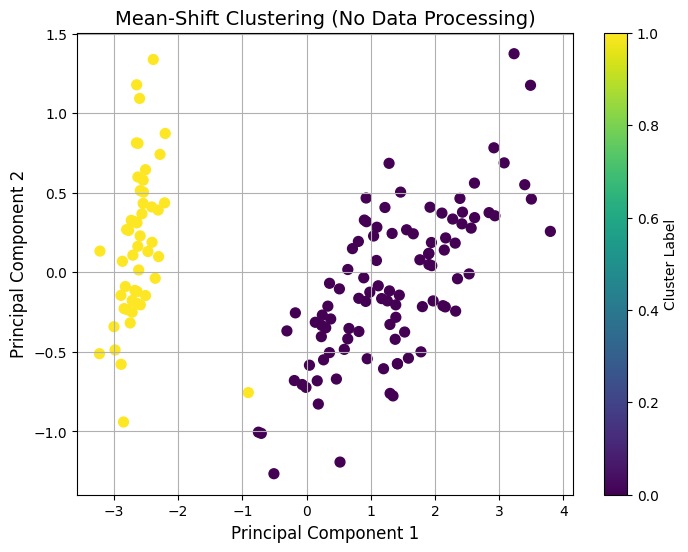

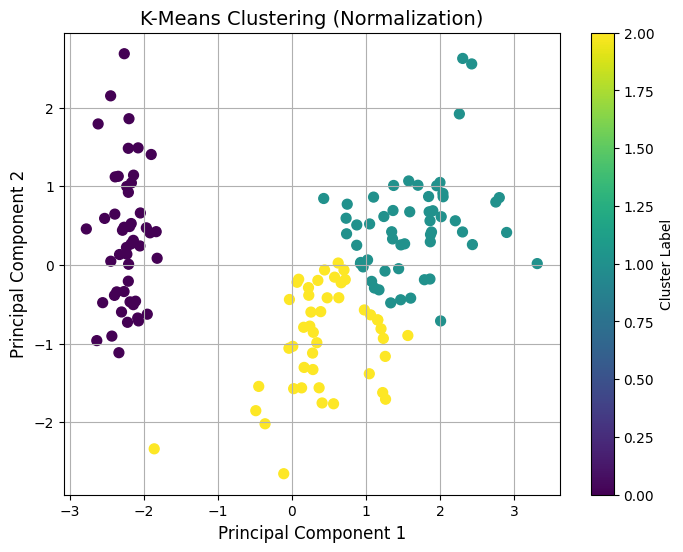

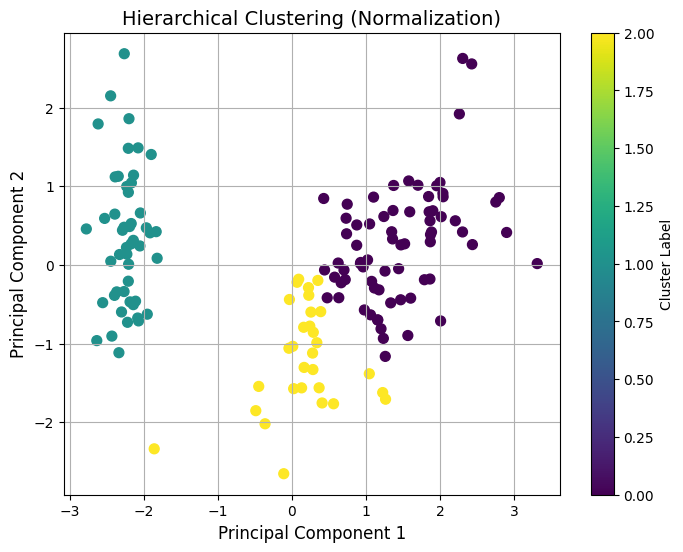

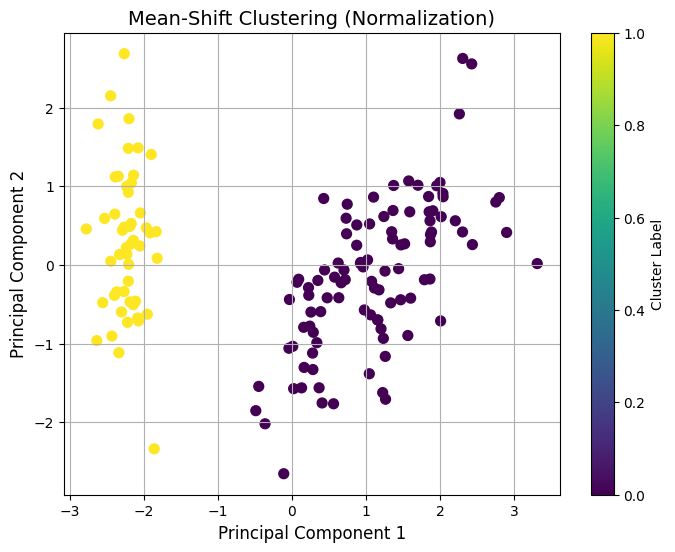

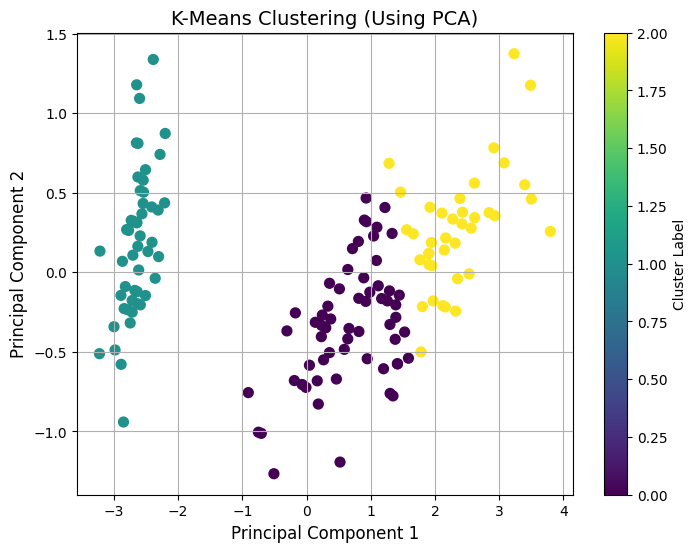

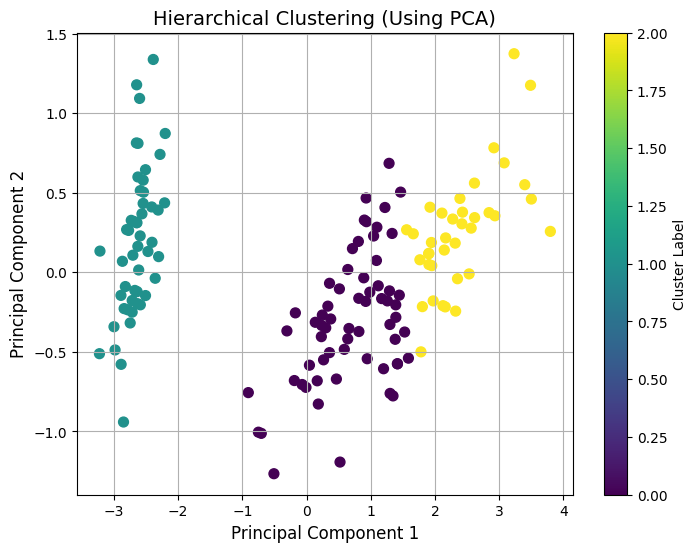

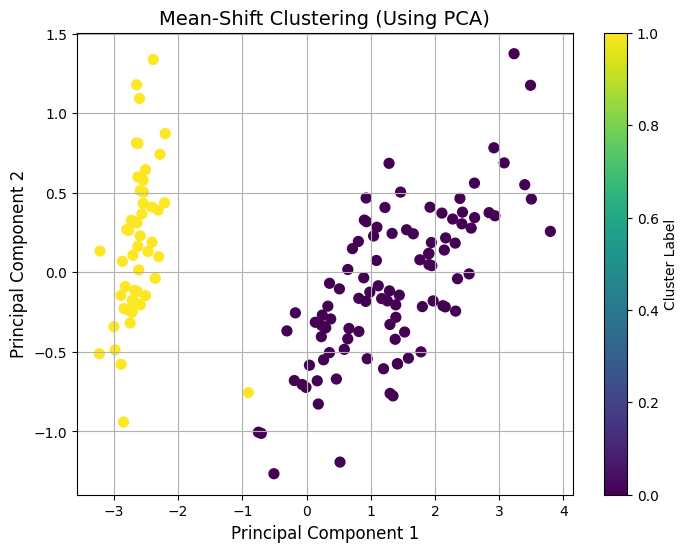

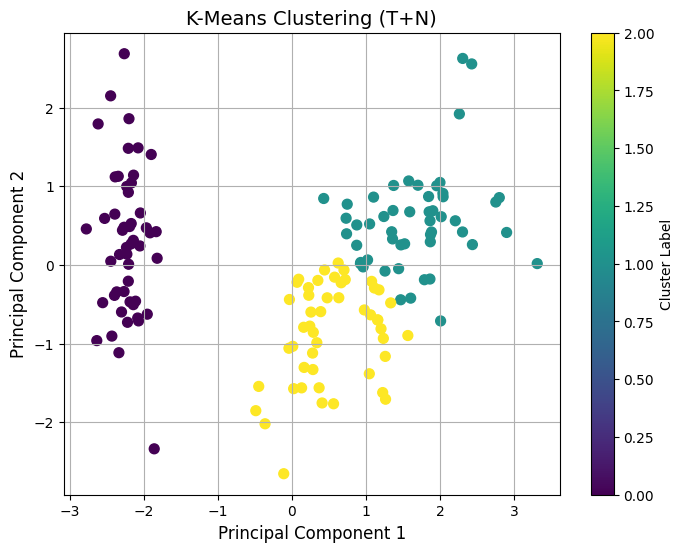

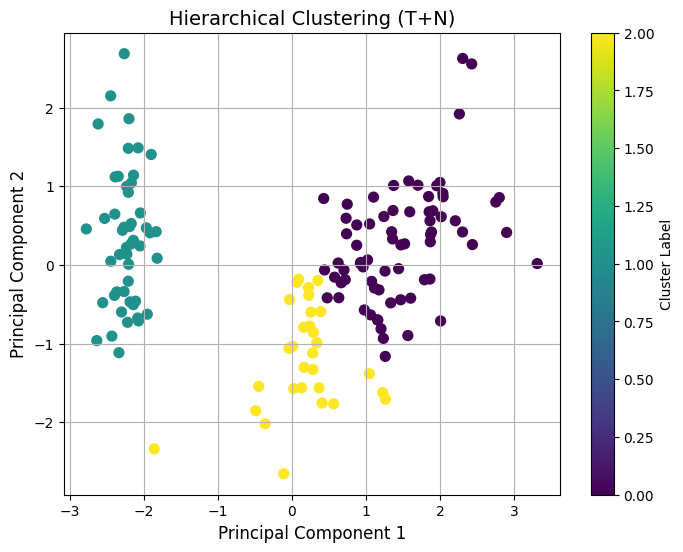

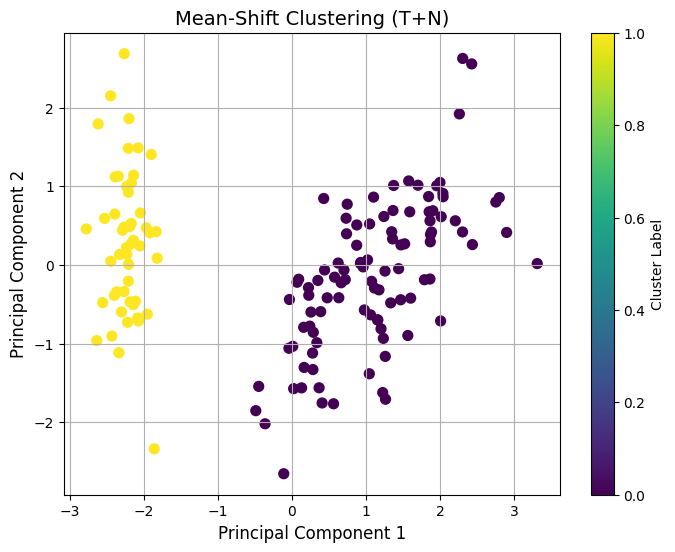

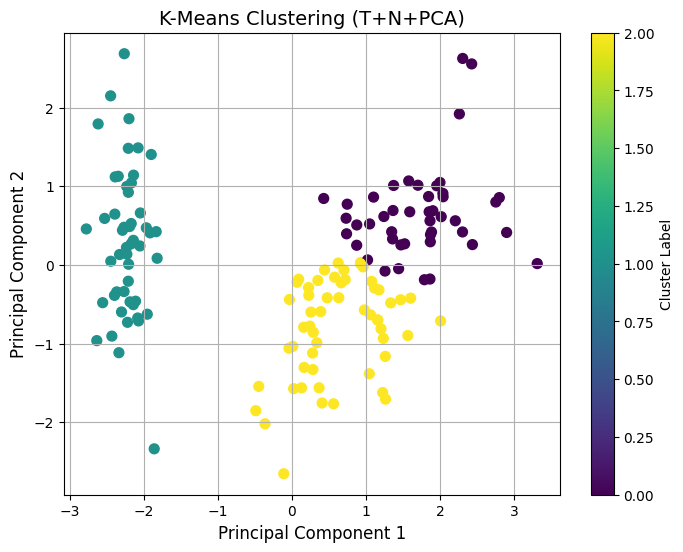

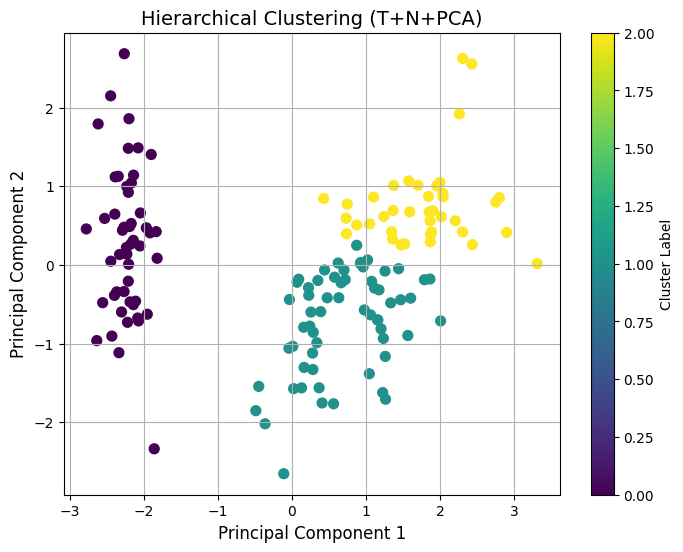

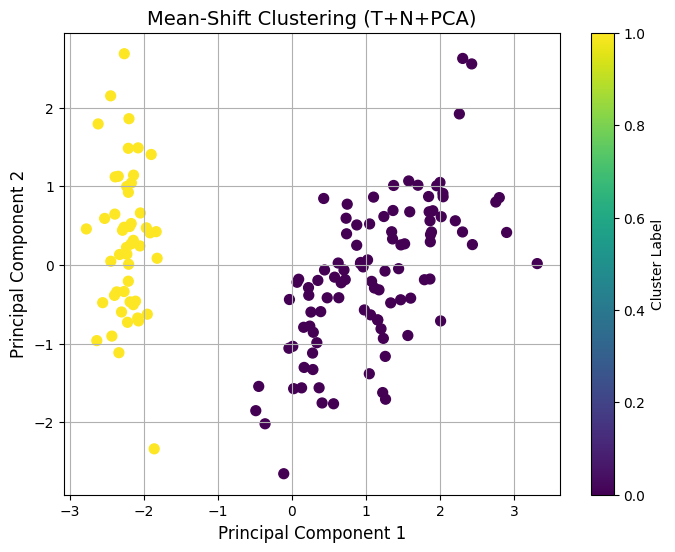

In [24]:
# Iterate over preprocessing methods and clustering algorithms
for preprocessing_name, preprocessed in preprocessed_data.items():
    for algo_name, algo_class in clustering_algorithms.items():
        if algo_name == 'Mean-Shift':
            # Mean-Shift does not require n_clusters
            model = algo_class()
        else:
            model = algo_class(n_clusters=3)

        labels = model.fit_predict(preprocessed)

        # For visualization, we need 2D data (use PCA if not already 2D)
        if preprocessed.shape[1] > 2:  # Reduce dimensions if necessary
            data_for_plot = pca.fit_transform(preprocessed)
        else:
            data_for_plot = preprocessed

        # Plot clustering result
        title = f"{algo_name} Clustering ({preprocessing_name})"
        plot_clusters(data_for_plot, labels, title)
